<a href="https://colab.research.google.com/github/kozyreviva/Data_Science/blob/main/%D0%A1%D0%B1%D0%BE%D1%80%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключим необходимые библиотеки.

In [101]:
import pandas as pd                                                             #подключение библиотек
import numpy as np
from scipy import stats as st

Загрузим датафрейм и сохраним в переменную.

In [102]:
try:                                                                            #загрузка датафрейма
  df = pd.read_csv("/datasets/games.csv")
except:
  df = pd.read_csv("Games csv.csv")

Выведем на экран таблицу.

In [103]:
df.head(10)                                                                     #вывод на экнан таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.


Получим общую информацию о таблице.

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Первичные выводы**

В таблце есть ряд ощибок. Такие как неправильный формат записи названий столбцов, неправильный тип данных и наличие пропусков. 

Названия столбцов необходимо привести к змеиному геристру со всеми строчными буквами.

Типы данных для даты нужно изменить а в другис столбцах необходимо детальное рассмотрение и в случае если такая необходимость будет также изменить.

Пропуски в таблице будут рассматриваться детально и где необходимо заполняться подходящими значениями, оставляться без изменений или удаляться.


--------------------------------------------------------------------------------

**ПРЕДОБРАБОТКА ДАННЫХ**

Приступим к исправлению ошибок.

Изменим регистр в названиях столбцов.

In [105]:
df.columns = df.columns.str.lower()                                             #изменение регистра на нижний

Проверим изменения

In [106]:
df.columns                                                                      #вывод названий столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Приступим к изменению типов данных.

Сперва поменяем тип столбца 'year_of_release'. Можно заметить что столбец состоит из года выпуска и можно просто поменять тип на 'int', но в столбце присутствуют пропущенные значения. Поэтому пропуски в столбце и примим решение что с ними делать. Применим сортировку по продажам в Северной Америке.

In [107]:
df.query('year_of_release.isna()',engine = "python").sort_values(by = "na_sales",ascending = False)          #срез по пропускам и применение сортировки                

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
...,...,...,...,...,...,...,...,...,...,...,...
11000,Demon Chaos,PS2,NaN,Action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10837,Egg Monster Hero,DS,NaN,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,E
15022,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10764,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN


Видим что игры которые указаны без года выпуска имеют очень малое количество продаж по всему миру, а в некоторых присутствуют пропуски по рейтингу.
Ввиду того что такие данные не информативны и по ним трудно делать какие-то выводы можно их удалить.

Удалим пропуски в столбце 'year_of_release' и изменим тип.

In [108]:
df = df.dropna(subset = ["year_of_release"]).copy()                                                                     #удаление пропусков
df.year_of_release = df.year_of_release.astype(int)                                                                     #изменение типа данных

Для столбцов с объёмом продаж по всем регионам тип данных 'float' допустим. Его изменять не будем.

Обработаем столбцы 'critic_score', 'user_score' и 'rating'.
Выведем на экран пропуски в столбце 'critic_score'.

In [109]:
df.query("critic_score.isna()",engine = "python")                                                                       #срез по пропускам

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видим что в строках с пропусками в столбце 'critic_score' имеются пропуски в столбцах 'user_score' и 'rating', а также можно заметить что продажи по большенству игр не превышают миллиона копий.

Несмотря на то что строк с пропусками больше 8 тысяч такие данные следует удалить. В дальнейшей работе они приведут к лишним трудностям в работе по построению графиков и прогнозов. 

Удалими какже пропуски из других столбцов по причине их малого количества.

 

In [110]:
df= df.dropna()                                                                                                     #удаление пропусков

Проверим столбец 'user_score'.

Выведем уникальные значения на экран.

In [111]:
df.user_score.unique()                                                                                               #вывод уникальных значений

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В этом столбце содержатся значения типа 'object', но данные вида 'float'.

В столбце имеются строки со значением 'tbd', что приводит к неправильному формату. Предположим что 'tbd' это аббревиатура 'too bad'.

Выведем все строки с 'tbd'.

In [112]:
df.query('user_score == "tbd"')                                                                                       #срез данных по значению 'tbd'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Из данных видно что показатели по продажам крайне малы. Значение 'tbd' можно перевести в значение '0', а затем поменять данные на тип 'float'.


In [113]:
df.user_score = df.user_score.replace("tbd","0")                                                                     #изменения значения на 0
df.user_score = pd.to_numeric(df.user_score)                                                                         #изменение типа данных

Проверим изменения.

In [114]:
df.user_score.unique()                                                                                               #вывод уникальных значений

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 0. , 8.8, 6.9, 9.4,
       6.8, 6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1,
       5.8, 5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1,
       3.5, 2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Подсчитаем суммарные продажи во всех регионах и сохраним в отдельный столбец 'total_sales'.

In [115]:
df["global_sales"] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales                                        #добавление столбца

Выведем на экран таблицу.

In [116]:
df.head()                                                                                                            #вывод таблицы на экран

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод**

Обработанный датафрейм в первую очередь имел неправильный регистр в названиях столбцов.

Также присутствует наличие пропусков в столбцах рейтинга игр. Такие пропуски пришлось удалить. Их образование указывает на изначальную невозможность оценить игру. Такими причинами может быть то что игры продавались малым тиражом и их просто напросто не оценивали,либо из-зи года выпуска игры. Старые игры не были доступны большенству людей и о них просто не знали, поэтому невозможно было дать объективную оценку.

Были изменены типы данных в столбцах 'year_of_release' и 'user_score'.
В 'user_score' было обработана аббревиатура 'tbd' обозначающая низкий рейтинг игры.

Произведён подсчёт продаж каждой игры по всему миру.

--------------------------------------------------------------------------------

**ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ**

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все
периоды?**

Построим гистограмму выпуска игр по годам.

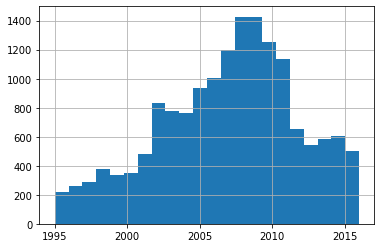

In [117]:
df.year_of_release.hist(bins = 22, figsize = (6,4), range = (1995, 2016))                                                                     #постройка гистограммы

Из гистограммы видно что активный рост происходит с начала 1995 года и по 2008 год. Но для построения прогнозов на 2017 год такой период не подходит поэтому лучше ориентироваться на ближайшие года с 2012 - 2016г.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с
наибольшими суммарными продажами и постройте распределение по годам.
За какой характерный срок появляются новые и исчезают старые платформы?**

Найдём платформы с наибольшими продажами.

In [118]:
df.groupby("platform")["global_sales"].sum().sort_values(ascending = False)                                             #сортировка платформ по продажам


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: global_sales, dtype: float64

Возьмём первые 4 и постром столбиковую диаграмму.

In [119]:
platforms = df.groupby("platform")["global_sales"].sum().sort_values(ascending = False).head(4).index.values                                    #спиcок из платформ

In [120]:
platforms_df = df.pivot_table(index = "year_of_release", columns = "platform",values = "global_sales", aggfunc = sum)                          #построение сводной таблицы

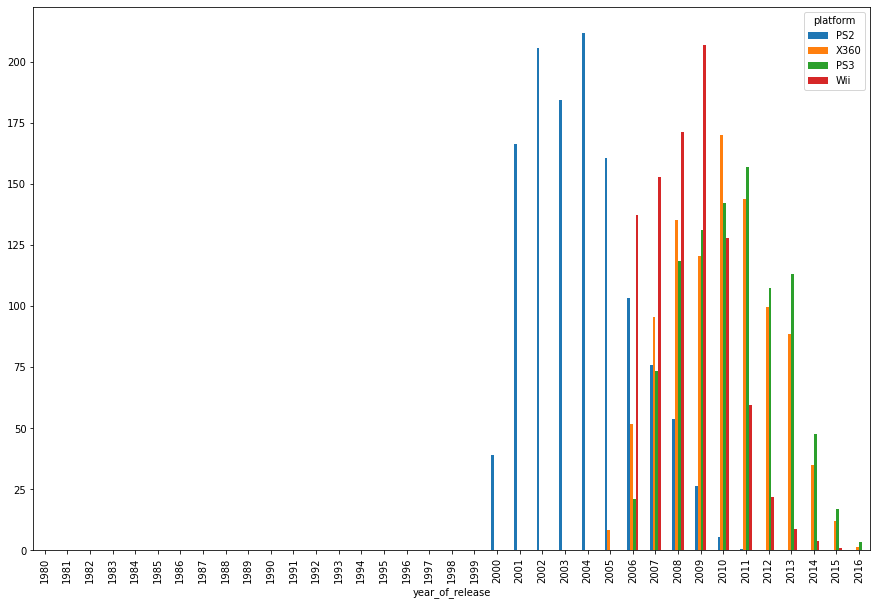

In [129]:
platforms_df.plot(y = platforms, kind = "bar", figsize = (15,10))                                                                         #вывод столбиковой диаграммы

Для 4 платформ можно заметить одинаковые особенности.

Из диаграмм видно что скорость появления таких платформ примерно год.
Время существования от 3-5 лет,  а потом в течении 3-4 лет использование платформы прекращается.

**Возьмите данные за соответствующий актуальный период. Актуальный
период определите самостоятельно в результате исследования предыдущих
вопросов. Основной фактор — эти данные помогут построить прогноз на 2017
год.**

Для построения прогноза на 2017 год необходимы данные примерно за 4 прошедших года. По таким данным можно определить набирающую популярность платформу и примерный срок ее существования.

Сохраним в переменную данные с 2012 года.
Выведем таблицу на экран.

In [122]:
topical_df = df.query('year_of_release >= 2012')                                                                             #срез по году
topical_df                                                                                                                   #вывод таблицы

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


**Какие платформы лидируют по продажам, растут или падают? Выберите
несколько потенциально прибыльных платформ.**

Выведем  список платформ лидирующие по продажам с 2012 года.

In [138]:
topical_platforms = topical_df.groupby("platform")["global_sales"].sum().sort_values(ascending = False).head(7).index.values                    #список из платформ
topical_platforms                                                                                                                               #вывод списка на экран

array(['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC'], dtype=object)

Построим диаграмму с платформами из этого списка по годам.

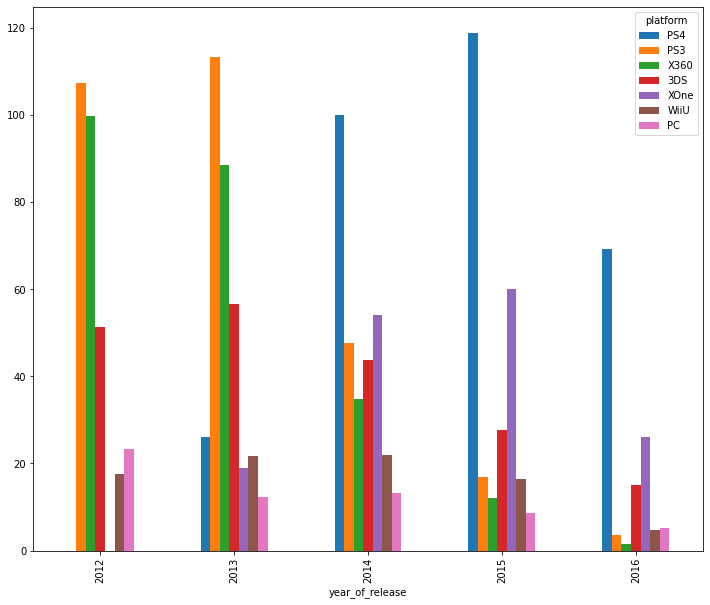

In [139]:
topical_df.pivot_table(index = "year_of_release", columns = "platform",values = "global_sales", aggfunc = sum).plot(y = topical_platforms, kind = "bar",figsize = (12,10))

Диаграмма показывает общий спад на всех платформах,вероятно это сказано тем что год еще не закончен и данные не полные. Тем не менее можно заметить что c момента выпуска 'ps4' и 'XOne' прошло 3 года что говорит о потанцеале платформ.

Также можно заметить довольно стабильные показатели на '3DS','PC' и 'WiiU'.
Показатели платформ 'ps3' и 'X360'  достигли минимума.